# Dataset 4 MenuStat
## MenuStat restaurant nutrition datasets
Esta tabla contiene información nutricional y categorías de los platos de mas de 90 restaurantes.
### origen:
https://www.menustat.org/
descargo la versión mas reciente del dataset.
 En este caso la 2022:
**ms_annual_data_2022.xlsx**


---






#### Transformación


*   data descargada en archivo de excel:
    **ms_annual_data_2022.xlsx**
*   Lo subo a la carpeta de este colab
*   Lo transformo en csv con el siguiente script
*   Lo descargo en formato csv
*   Lo subo a GitHub
Paralelamente uso un tablero para conocer los datos:
https://lookerstudio.google.com/reporting/a1ba416a-4f4e-4837-931d-162502eb9a92





---



#Hipotesis
La comida rápida es conocida por su conveniencia y asequibilidad, pero también es famosa por su alto contenido en calorías, grasas y azúcar. Este análisis de datos tiene como objetivo arrojar luz sobre el valor nutricional de estos productos, ayudando a los consumidores a tomar decisiones más informadas sobre sus elecciones de alimentos.

Con información sobre calorías, grasas, carbohidratos, proteínas y otros nutrientes clave, este proyecto busca comprender mejor el impacto nutricional del consumo de comida rápida y trabajar para crear opciones de alimentos más saludables en la industria de la comida rápida.

Se plantea analizar la oferta de varias cadenas de comida a fin de considerarlas como opción de alimento que otorge nutrientes necesarios y con el menor imparto negativo en la salud.
Algunas preguntas que surgen como motor de invertigación son:


*   ¿Puede un adulto mantener una dieta saludable solo consumiendo comida de restaurantes?
*   Dado que tanto niños como adolescentes son atraidos por su sabor y significancia de pertenencia en una sociedad de consumo,¿ pordrían los adultos responsables de su nutrición (familia o instituciones) ofrecer algunos de sus platos como opción sin descuidar su nutrición?



## carga del Dataset

In [38]:
import pandas as pd
url = "https://raw.githubusercontent.com/vierbo/Data-Science-1/main/MenuStat%20restaurant%20nutrition%20facts/ms_annual_data_2022.csv"
df = pd.read_csv(url, sep=',', encoding='utf-8')

<ipython-input-38-e8c6c6e66d49>:3: DtypeWarning: Columns (7,13,14,18,20,26,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=',', encoding='utf-8')


In [39]:
df.shape

(26238, 33)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26238 entries, 0 to 26237
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   matched_2021            26238 non-null  int64  
 1   new_item_2022           26238 non-null  int64  
 2   menu_item_id            26238 non-null  int64  
 3   food_category           26238 non-null  object 
 4   restaurant              26237 non-null  object 
 5   item_name               26238 non-null  object 
 6   item_description        26238 non-null  object 
 7   serving_size            12665 non-null  object 
 8   serving_size_text       49 non-null     object 
 9   serving_size_unit       12214 non-null  object 
 10  serving_size_household  4207 non-null   object 
 11  calories                25787 non-null  object 
 12  total_fat               25536 non-null  float64
 13  saturated_fat           25418 non-null  object 
 14  trans_fat               23997 non-null

## Clasificación de los campos
Selecciono los grupos de columnas que voy a trabajar, agrupandolos por su contenido y descarto los que son irrelevantes para este análisis.

In [41]:
# Columnas que contienen información de categorías y denominaciones.
category_columns = df.columns[2:6]
df_category_columns = df[category_columns]
# Columnas que contienen valores para medir.
value_columns = df.columns[11:22]
df_value_columns = df[value_columns]
# Columnas que contienen valores alternativos en formato de rango
altValue_columns = df.columns[23:]
df_altValue_columns = df[altValue_columns]
# Creo un subconjunto de datos
df = pd.concat([df_category_columns, df_value_columns, df_altValue_columns], axis=1)

In [42]:
#evalúo si "menu_item_id" sirve como indice de la tabla.
serie = pd.Series(["menu_item_id"])
duplicados = serie[serie.duplicated()].count()
duplicados

0

In [43]:
# viendo que no existen valores duplicados, adopto su contenido como indice
df = df.set_index("menu_item_id")

### corrección de dataTypes
Habiendo observado que no todas las series con valores medibles son de tipo numerico, se fuerza al dataframe a interpretarlos como tales.

In [44]:
# defino tipo de datos por columna
columnas = df.columns[3:14]
for i in columnas:
  try:
    df[i] = pd.to_numeric(df[i], errors="coerce")
  except:
    pass
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26238 entries, 10012 to 956558
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   food_category       26238 non-null  object 
 1   restaurant          26237 non-null  object 
 2   item_name           26238 non-null  object 
 3   calories            25782 non-null  float64
 4   total_fat           25536 non-null  float64
 5   saturated_fat       25417 non-null  float64
 6   trans_fat           23992 non-null  float64
 7   cholesterol         25194 non-null  float64
 8   sodium              25254 non-null  float64
 9   carbohydrates       25270 non-null  float64
 10  dietary_fiber       24802 non-null  float64
 11  sugar               25188 non-null  float64
 12  protein             25221 non-null  float64
 13  potassium           1787 non-null   float64
 14  calories_text       194 non-null    object 
 15  total_fat_text      8 non-null      object 
 16 

### manejo de valores NaN

In [45]:
null_vals = dict(df.isnull().sum())
null_vals

{'food_category': 0,
 'restaurant': 1,
 'item_name': 0,
 'calories': 456,
 'total_fat': 702,
 'saturated_fat': 821,
 'trans_fat': 2246,
 'cholesterol': 1044,
 'sodium': 984,
 'carbohydrates': 968,
 'dietary_fiber': 1436,
 'sugar': 1050,
 'protein': 1017,
 'potassium': 24451,
 'calories_text': 26044,
 'total_fat_text': 26230,
 'saturated_fat_text': 26230,
 'trans_fat_text': 26232,
 'cholesterol_text': 26232,
 'sodium_text': 26230,
 'carbohydrates_text': 26230,
 'dietary_fiber_text': 26232,
 'sugar_text': 26230,
 'protein_text': 26230}

Dado que en el dataset existen para algunos indicadores (**df_value_columns**), columnas alternativas que contienen rango de valores (**df_altValue_columns**), se intenta obtener el promedio de estos rangos cuando el indicador original no tenga valor explícito.


In [46]:
# Reemplazos valores NaN con el promedio del rango
for i in value_columns:
  try:
    #mínimo y máximo de la columna "serieX"_text
    min_values = df[i+"_text"].str.split("-", n=1).str[0]
    max_values = df[i+"_text"].str.split("-", n=1).str[1]
    # Convertir a float
    min_values = pd.to_numeric(min_values)
    max_values = pd.to_numeric(max_values)
    # Calcular el promedio de ambos valores
    average_values = (min_values + max_values) / 2
    # Reemplazar valores NaN en serieX
    df[i].fillna(average_values, inplace=True)
    # Elimino la columna "serieX"_text
    df.drop(columns=[i+"_text"], inplace=True)
  except:
     ValueError
#observo los resultados
null_vals = dict(df.isnull().sum())
null_vals

{'food_category': 0,
 'restaurant': 1,
 'item_name': 0,
 'calories': 281,
 'total_fat': 694,
 'saturated_fat': 813,
 'trans_fat': 2242,
 'cholesterol': 1038,
 'sodium': 976,
 'carbohydrates': 960,
 'dietary_fiber': 1430,
 'sugar': 1042,
 'protein': 1009,
 'potassium': 24451}

In [47]:
# Viendo que son varias las series que aún tienen valores NaN, evalúo porcentualmente su incidencia.
for key,val in null_vals.items():
    print(f"% valores nulos para {key}:   {(int(val)/df.shape[0])*100}")

% valores nulos para food_category:   0.0
% valores nulos para restaurant:   0.003811266102599284
% valores nulos para item_name:   0.0
% valores nulos para calories:   1.0709657748303987
% valores nulos para total_fat:   2.645018675203903
% valores nulos para saturated_fat:   3.0985593414132175
% valores nulos para trans_fat:   8.544858602027594
% valores nulos para cholesterol:   3.9560942144980564
% valores nulos para sodium:   3.7197957161369004
% valores nulos para carbohydrates:   3.6588154584953116
% valores nulos para dietary_fiber:   5.450110526716975
% valores nulos para sugar:   3.971339278908453
% valores nulos para protein:   3.845567497522677
% valores nulos para potassium:   93.18926747465508


In [48]:
# observando los resultados, dropeo la serie "potassium", dados sus pocos registros no vacíos.
df.drop(columns=["potassium"], inplace=True)

In [49]:
# Sobreescribo los conjuntos de columnas con valores medibles
value_columns = df.columns[3:13]
df_value_columns = df[value_columns]
value_columns

Index(['calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol',
       'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein'],
      dtype='object')

#Exploratory Data Analysis



### Interpretación de los datos



In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ordeno las categorías alfabeticamente para comodidad visual
df = df.sort_values(by='food_category')

In [51]:
df_restaurant_count = df['restaurant'].value_counts()
df_restaurant_count = df_restaurant_count.to_frame()
df_restaurant_count.reset_index(inplace=True)
df_restaurant_count.columns = ["restaurant", "recuento"]
df_restaurant_count.sort_values(by="recuento", ascending=False)
df_restaurant_count

,restaurant,recuento
0,Firehouse Subs,1085
1,Golden Corral,1010
2,Dunkin' Donuts,939
3,Starbucks,799
4,Perkins,702
...,...,...
87,Little Caesar's,85
88,Popeyes,79
89,El Pollo Loco,77
90,Five Guys,36


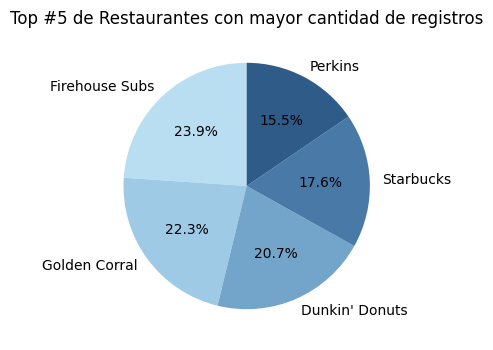

In [52]:
top_5 = df_restaurant_count.head(5)
etiquetas = top_5["restaurant"].to_list()
valores = top_5["recuento"].to_list()
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
#autopct="%1.1f%%"

plt.figure(figsize=(20,4))
plt.pie(valores, labels=etiquetas, autopct="%1.1f%%" ,colors = colores, startangle = 90)
plt.title("Top #5 de Restaurantes con mayor cantidad de registros")
#plt.legend()
plt.show()

In [53]:
df_food_category_count = df["food_category"].value_counts()
df_food_category_count = df_food_category_count.to_frame()
df_food_category_count.reset_index(inplace=True)
df_food_category_count.columns = ["food_category", "recuento"]
total_recuento = df_food_category_count["recuento"].sum()
df_food_category_count["porcentaje"] = (df_food_category_count["recuento"] / total_recuento)
df_food_category_count.sort_values(by="recuento", ascending=False)
df_food_category_count

,food_category,recuento,porcentaje
0,Beverages,9150,0.348731
1,Toppings & Ingredients,5086,0.193841
2,Entrees,2994,0.114109
3,Appetizers & Sides,2181,0.083124
4,Sandwiches,1975,0.075273
5,Desserts,1273,0.048517
6,Pizza,1026,0.039104
7,Salads,687,0.026183
8,Baked Goods,595,0.022677
9,Burgers,563,0.021457


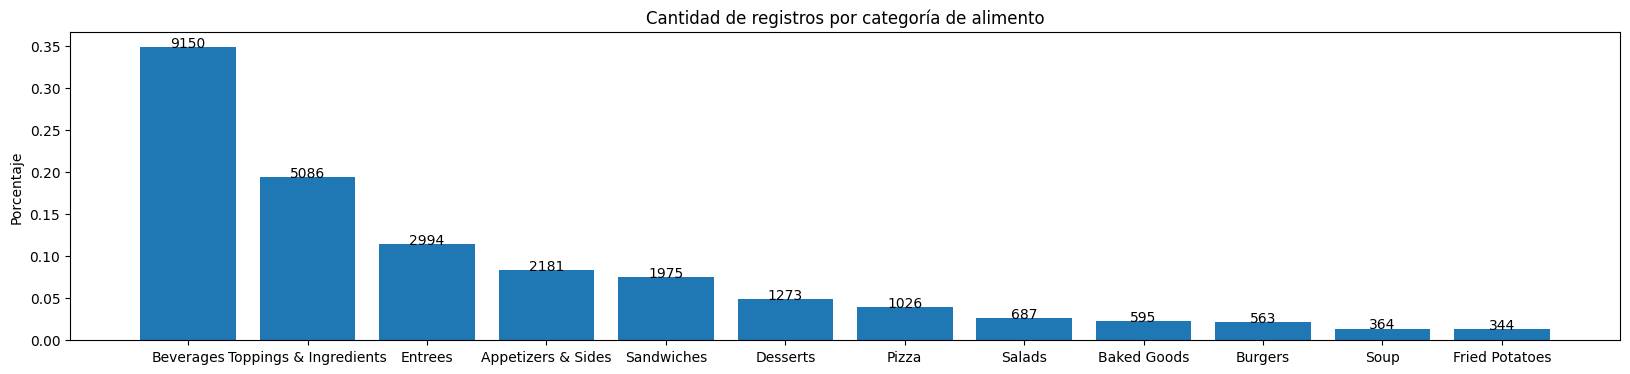

In [54]:
fig, ax = plt.subplots(figsize=(20, 4))
plt.bar(df_food_category_count["food_category"], df_food_category_count["porcentaje"])
#plt.xlabel("Categoría de comida")
plt.ylabel("Porcentaje")

# Agregar etiquetas con el valor de "recuento" a cada barra
for i in range(len(df_food_category_count)):
    plt.annotate(str(df_food_category_count["recuento"][i]), (df_food_category_count["food_category"][i], df_food_category_count["porcentaje"][i]),ha="center")
plt.title("Cantidad de registros por categoría de alimento")
plt.show()

Dado que las preguntas sobre este conjunto de datos se centran en las
caracteríasticas de los platos como una opción de almuerzo, se decide seguir adelante sin las opciones de bebidas, postres y opciones de mierienda.

Para conocer qué tipo de alimentos contiene la categoría "Toppings & Ingredients", genero una nube de palabras para conococer las más frecuentes.

<ipython-input-56-969828b036b9>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  toppings_df = toppings_df[df["item_name"].str.split().str.len() >= 5]


Text(0.5, 1.0, 'valores más frecuentes en la categororía Toppings & Ingredients')

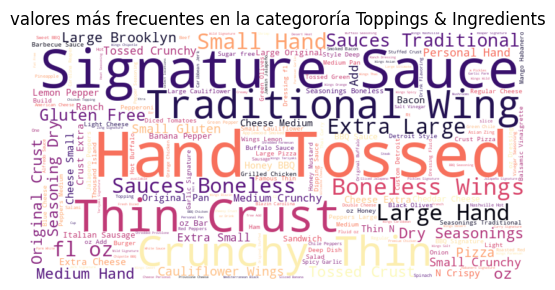

In [56]:
from wordcloud import WordCloud
#filtro solo los registros de "Toppings & Ingredients"
toppings_df = df[df["food_category"] == "Toppings & Ingredients"]
#luego de algunas pruebas, elimino las palabras cortas que representan medidas
toppings_df = toppings_df[df["item_name"].str.split().str.len() >= 5]
#guardo los valores en una lista
toppings_list = toppings_df["item_name"].tolist()
#guardo los valores en una sola cadena de texto
toppings_string = ", ".join(toppings_list)
#text=toppings_string
wc = WordCloud(width = 800, height = 400, background_color = "white",
               colormap = "magma")
wc.generate(toppings_string)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title("valores más frecuentes en la categororía Toppings & Ingredients")

# plt.show()

In [57]:
df= df.query("food_category not in ('Beverages','Desserts','Baked Goods','Toppings & Ingredients')")

In [58]:
# analizo los valores de cada estadistica de la serie, agrupados por categoría
df.groupby('food_category')[value_columns].describe()

calories                                               \
                      count        mean         std    min    25%    50%   
food_category                                                              
Appetizers & Sides   2177.0  539.152503  720.657530    0.0  140.0  310.0   
Burgers               562.0  804.065836  466.356597  110.0  500.0  770.0   
Entrees              2945.0  814.441426  912.574279    0.0  340.0  600.0   
Fried Potatoes        344.0  508.901163  358.289061    0.0  277.5  425.0   
Pizza                1026.0  509.990253  839.443515   25.0  210.0  270.0   
Salads                679.0  540.891016  374.154670    5.0  270.0  490.0   
Sandwiches           1966.0  659.446185  388.251038    0.0  400.0  570.0   
Soup                  362.0  405.337017  381.750273   40.0  200.0  290.0   

                                    total_fat             ... sugar         \
                       75%      max     count       mean  ...   75%    max   
food_category                                             ...                
Appetizers & Sides   700.0   9850.0    2151.0  30.566155  ...  10.0  288.0   
Burgers             1020.0   6530.0     549.0  50.362477  ...  12.0  147.0   
Entrees             1020.0  13734.0    2820.0  44.387340  ...  16.0  719.0   
Fried Potatoes       602.5   2310.0     343.0  28.939067  ...   2.0   58.0   
Pizza                380.0   7200.0    1025.0  23.272195  ...   5.0   66.0   
Salads               730.0   4120.0     664.0  36.246235  ...  11.0  228.0   
Sandwiches           840.0   4990.0    1856.0  33.222101  ...   9.0  138.0   
Soup                 480.0   2940.0     356.0  21.889045  ...   9.0   77.0   

                   protein                                               \
                     count       mean        std  min   25%   50%   75%   
food_category                                                             
Appetizers & Sides  2128.0  24.678524  44.593674  0.0   4.0  10.0  28.0   
Burgers              549.0  39.608379  21.952454  4.0  24.0  38.0  53.0   
Entrees             2821.0  43.636086  58.158220  0.0  17.0  30.0  52.0   
Fried Potatoes       343.0   8.961224  11.394563  0.0   3.0   5.0  10.0   
Pizza               1013.0  21.237907  37.826101  1.0   7.0  11.0  16.0   
Salads               661.0  26.951891  19.448475  0.0   9.0  26.0  40.0   
Sandwiches          1839.0  29.840527  19.099121  0.0  17.0  26.0  38.5   
Soup                 356.0  14.900281  15.275564  1.0   6.0  10.0  18.0   

                            
                       max  
food_category               
Appetizers & Sides   562.0  
Burgers              211.0  
Entrees             1325.0  
Fried Potatoes        94.0  
Pizza                314.0  
Salads               152.0  
Sandwiches           206.0  
Soup                 103.0  

[8 rows x 80 columns]

### Distribución de los valores


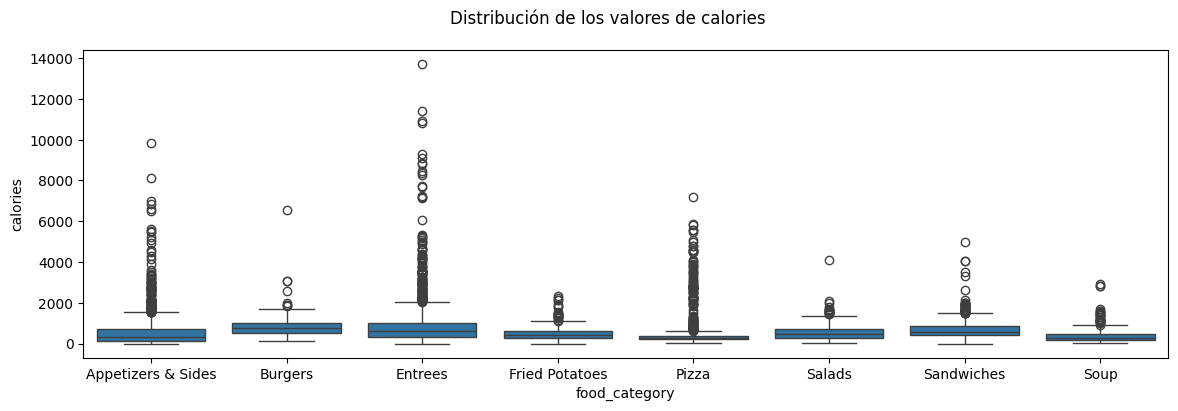

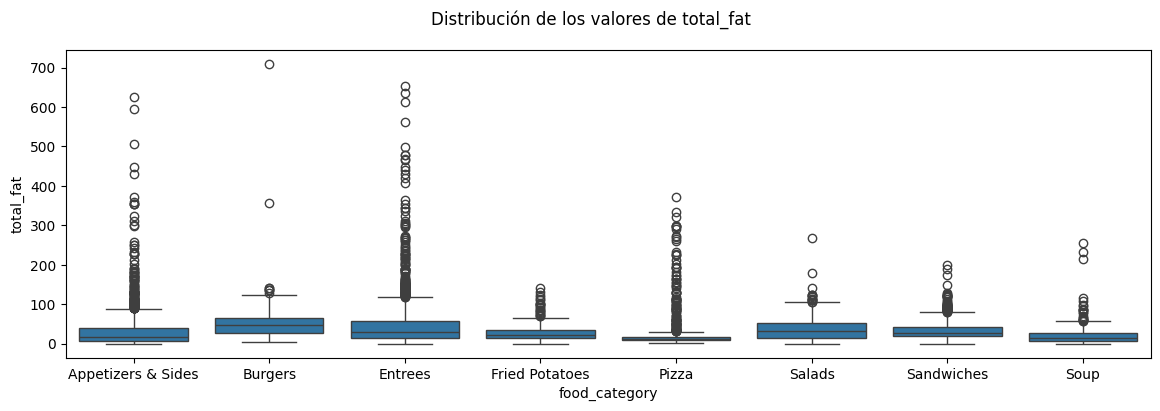

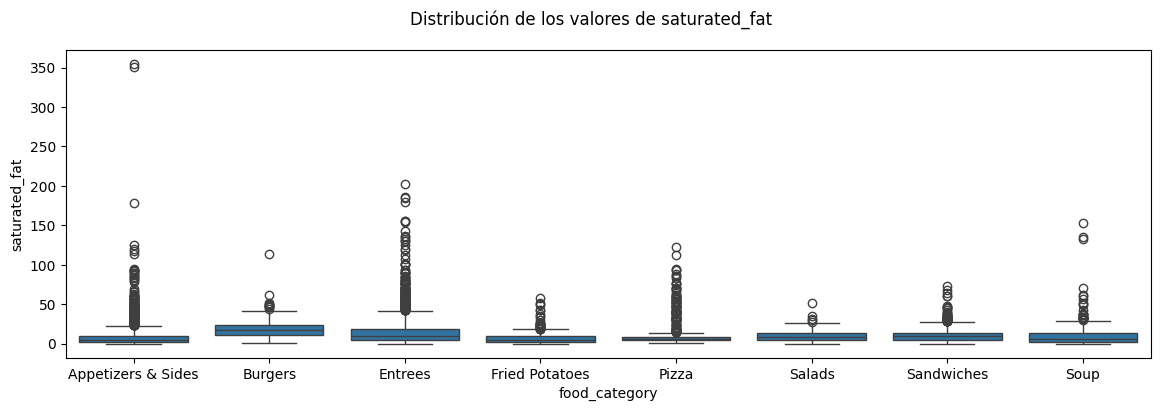

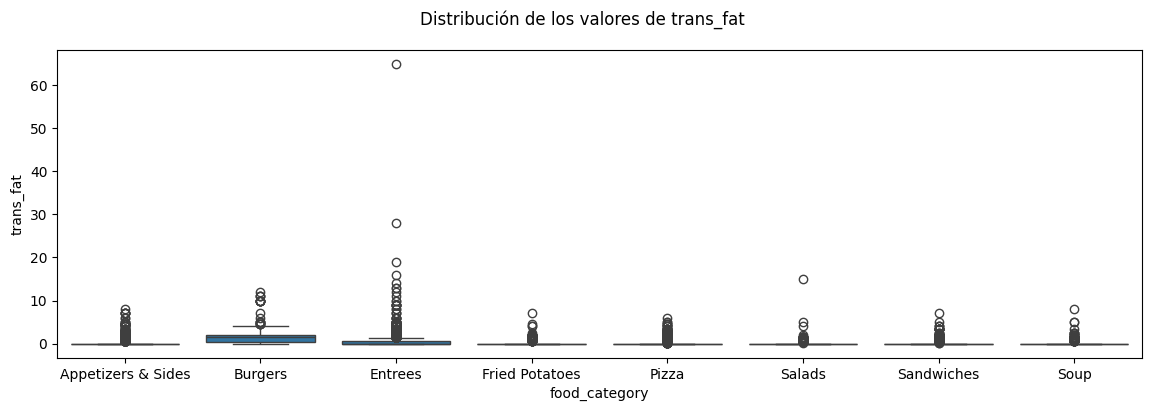

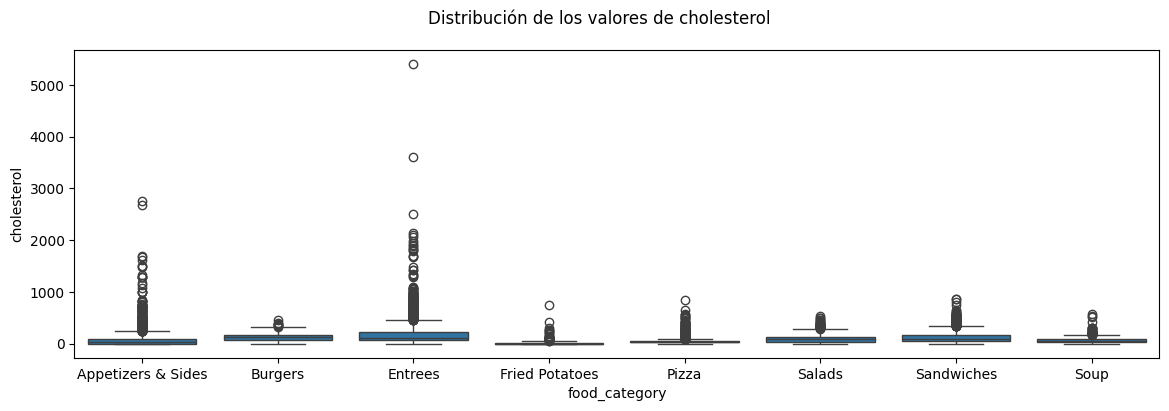

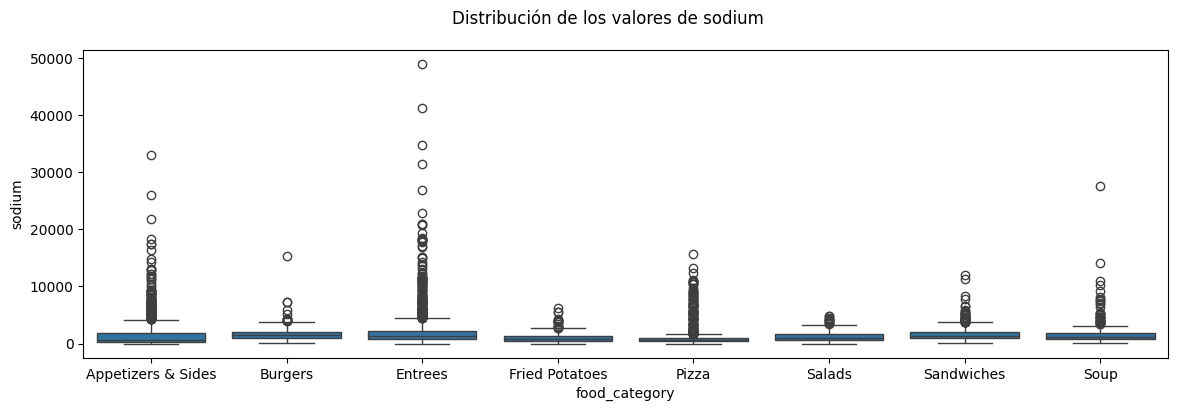

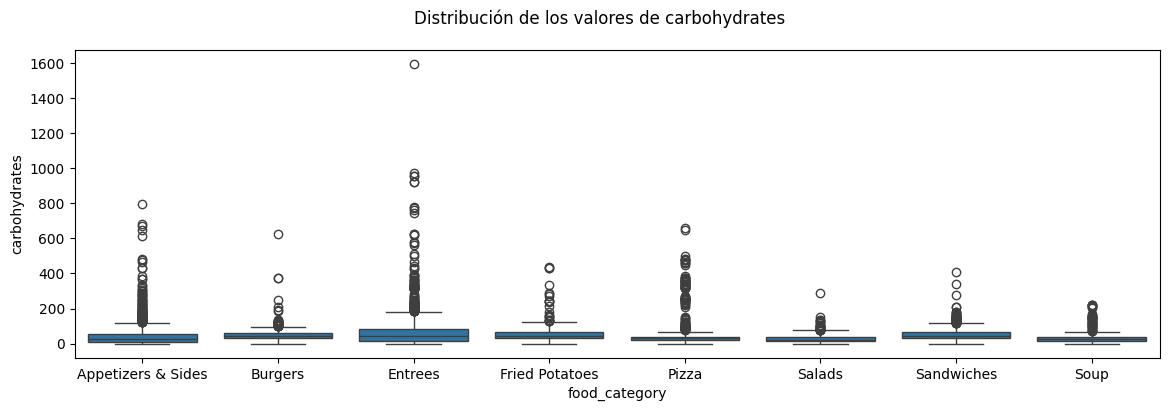

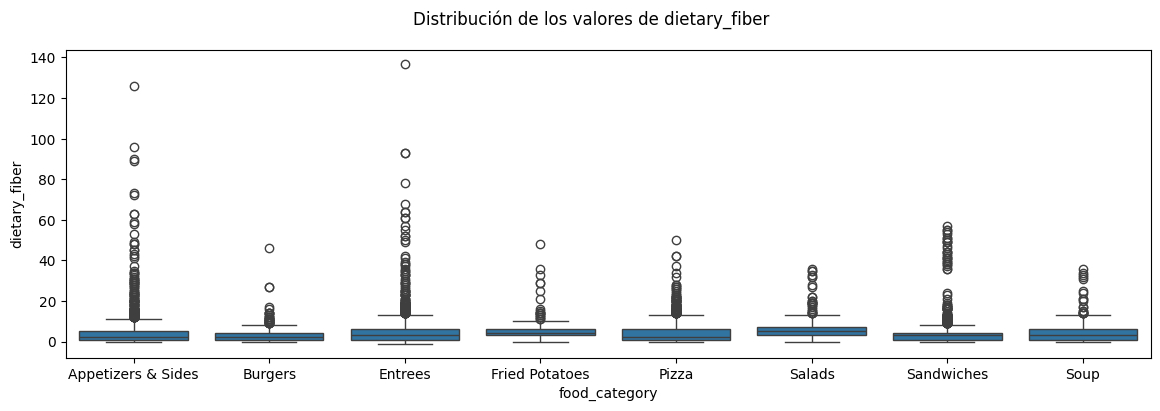

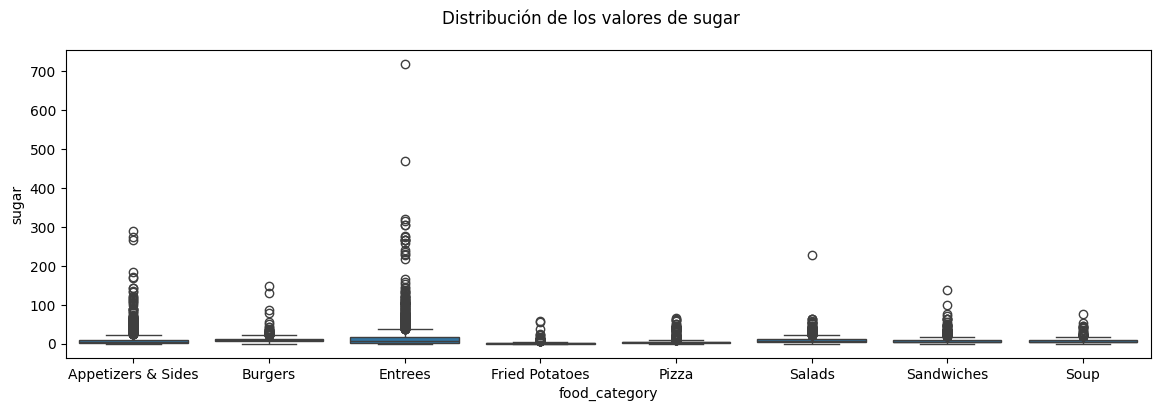

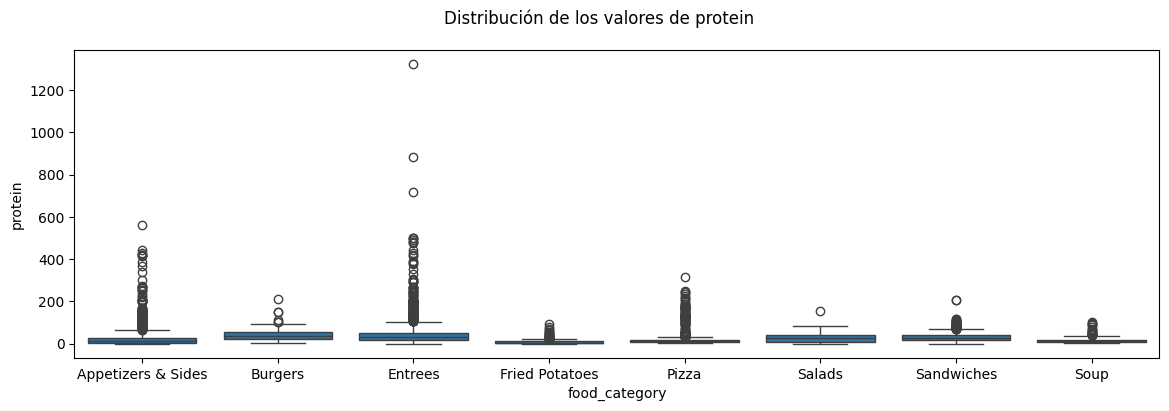

In [59]:
# analizo la concentración de valores en cada indicador , por categoría, mediante un gráfico de bigotes.
value_columns = df.columns[3:13]

for i in value_columns:
  fig, ax = plt.subplots(figsize=(14, 4))
  fig.suptitle("Distribución de los valores de "+i)
  sns.boxplot(data=df, x="food_category", y=i, ax=ax)

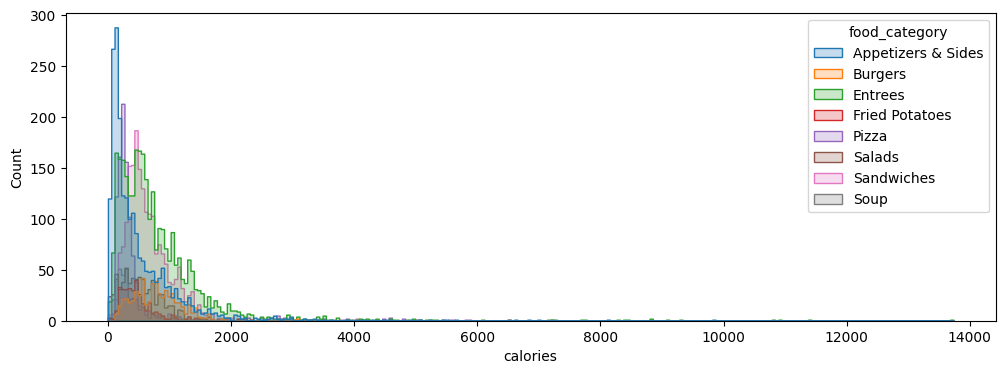

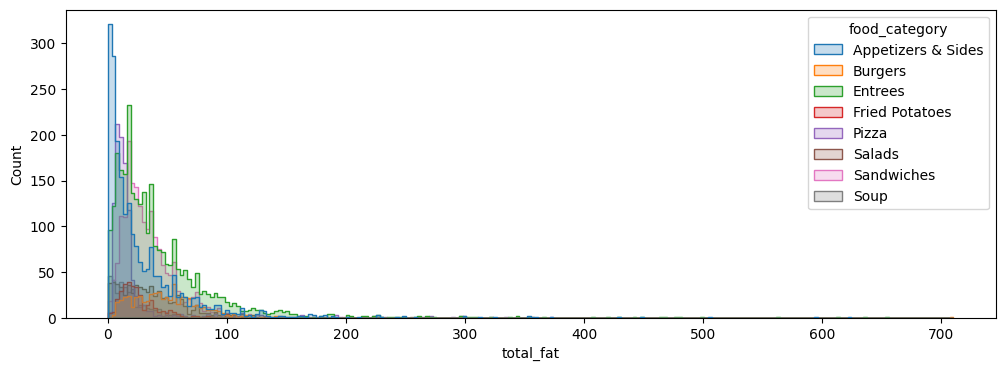

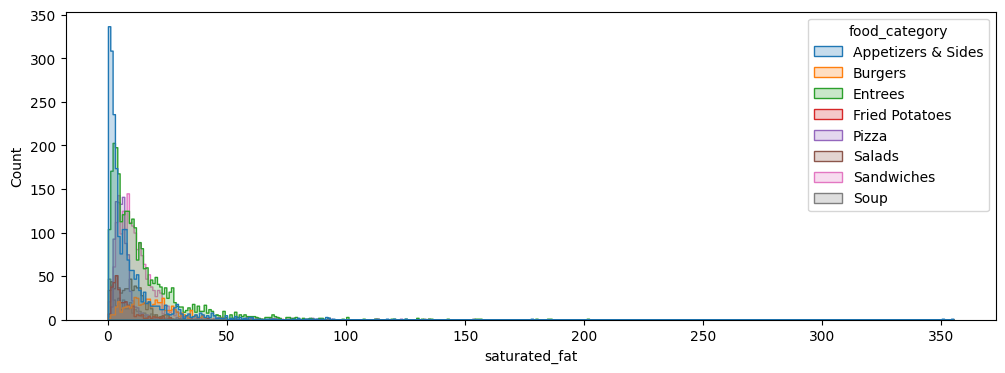

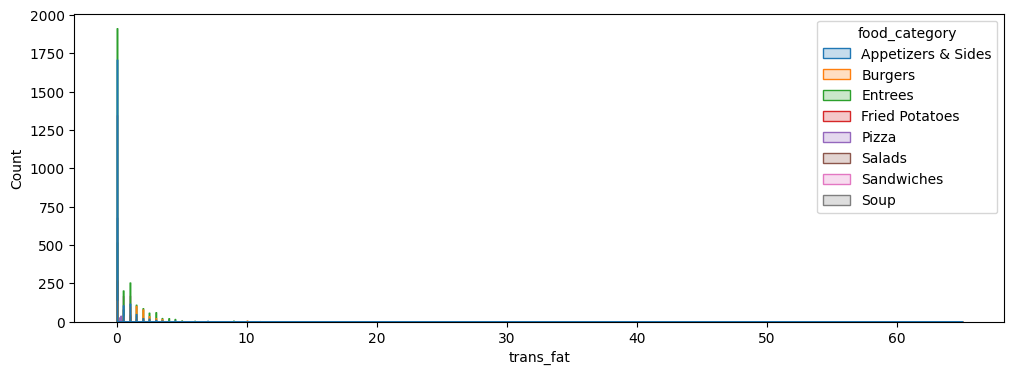

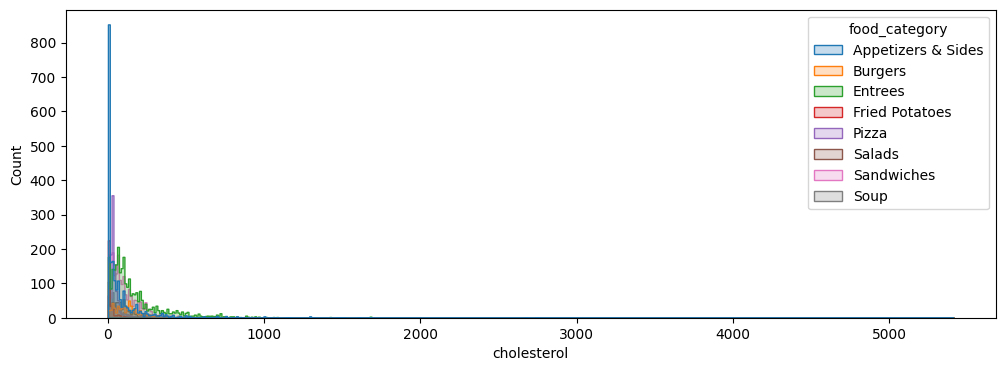

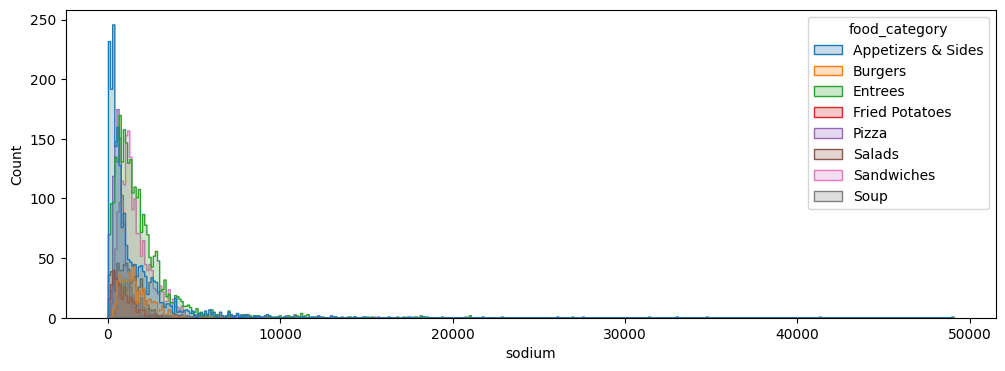

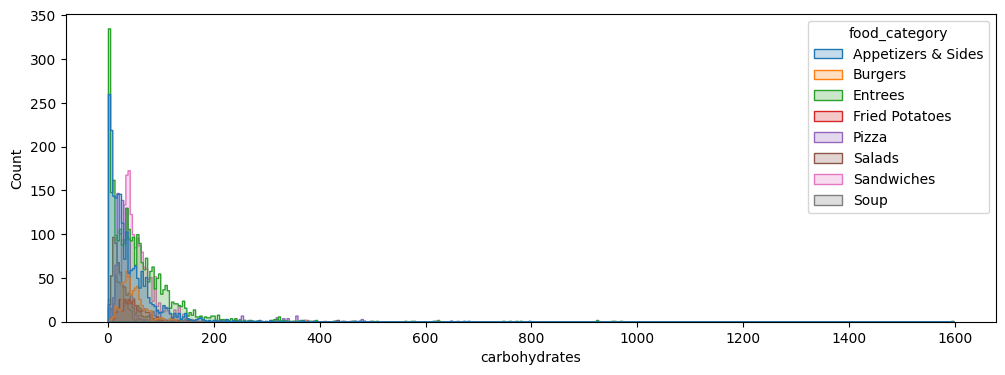

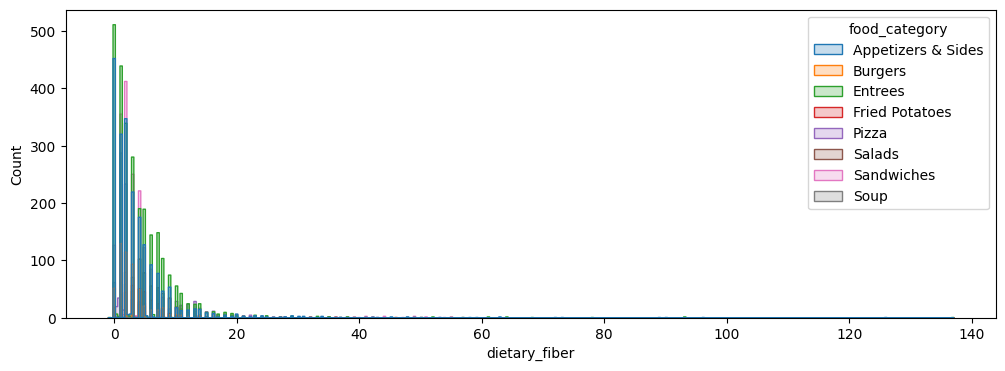

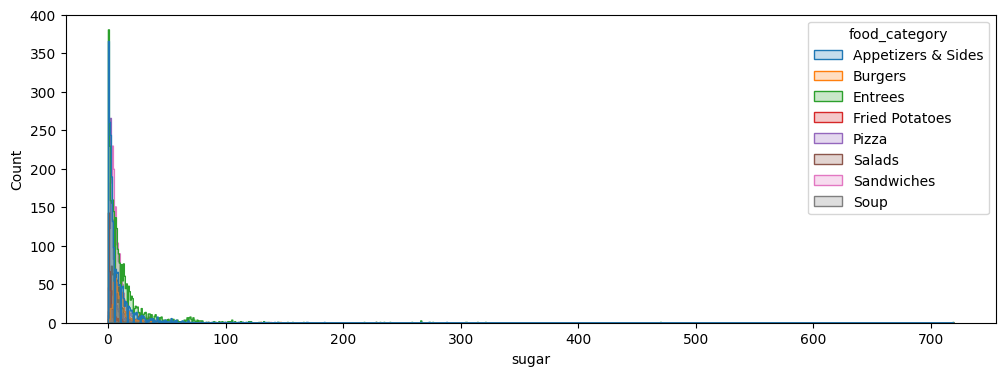

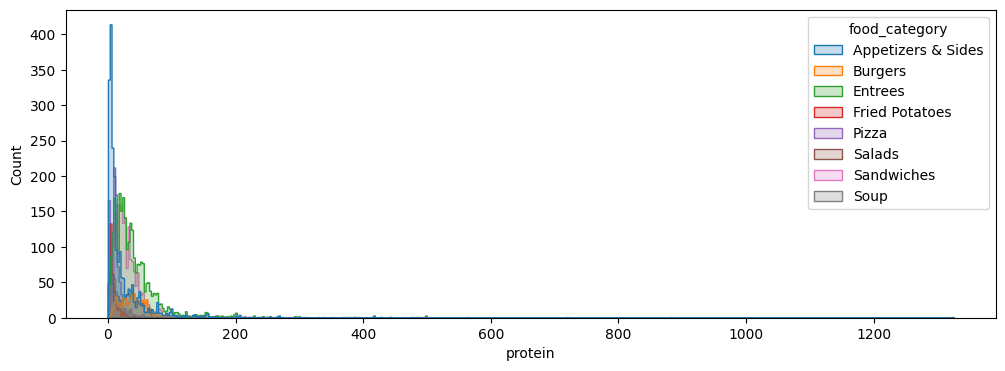

In [60]:
# se crea una vista alternativa sin la categoría "Toppings & Ingredients", dado que se despega del comportamiento de las otras categorías.
# también se hace un recorte de los valores superiores a 3000 Kcal para hacer foco en los valores más frecuentes.
# para eso, filtro la data en un nuevo dataFrame
#filtered_df = df.query('food_category where calories <= 3000')

for i in value_columns:
  fig, ax = plt.subplots(figsize=(12, 4))
  sns.histplot( data=df, x=i,hue="food_category", element="step", common_norm=False, ax=ax, stat="count")

### valores Promedio

In [61]:
# Subtabla con los promedios variables por categoría de comida
df_promedio = df.groupby("food_category")[value_columns].mean()
df_promedio

,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
food_category,,,,,,,,,,
Appetizers & Sides,539.152503,30.566155,9.250628,0.248037,90.432388,1434.020331,42.350164,4.165007,9.387542,24.678524
Burgers,804.065836,50.362477,18.081056,1.485401,121.700730,1652.888483,50.738980,3.122677,11.049180,39.608379
Entrees,814.441426,44.387340,14.879965,0.588365,191.287895,1926.128577,61.766417,4.432833,15.173009,43.636086
Fried Potatoes,508.901163,28.939067,7.432070,0.282991,22.872404,989.769679,59.927114,5.020991,2.448503,8.961224
Pizza,509.990253,23.272195,9.562194,0.286801,56.197073,1170.691707,51.830957,4.544289,5.284174,21.237907
Salads,540.891016,36.246235,8.822440,0.186621,100.894351,1157.247344,28.000753,5.816388,10.522323,26.951891
Sandwiches,659.446185,33.222101,10.814806,0.238145,123.026415,1597.434995,53.229752,3.980263,7.312210,29.840527
Soup,405.337017,21.889045,10.721910,0.298817,66.971831,1774.155882,37.046348,4.526549,7.750000,14.900281


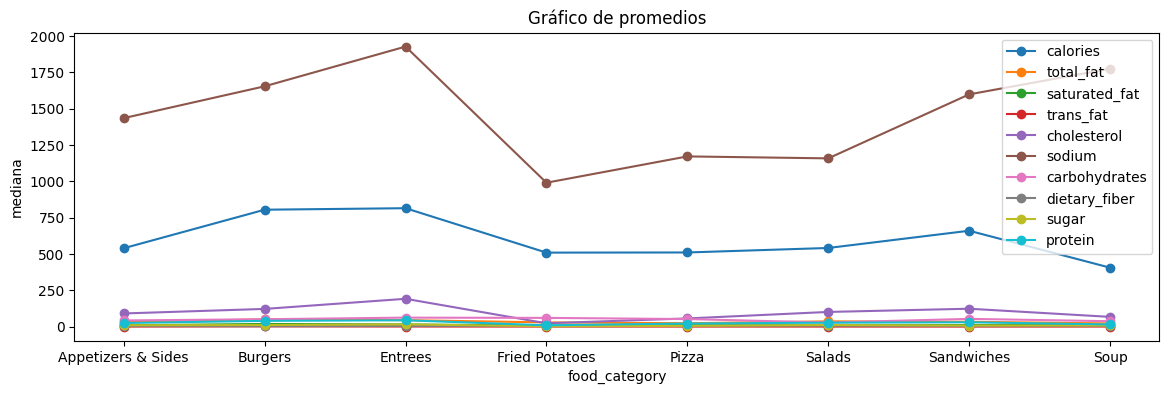

In [62]:
fig, ax = plt.subplots(figsize=(14, 4))

for i, value_column in enumerate(value_columns):
    df[value_column].groupby(df["food_category"]).mean().plot(
        ax=ax,
        kind="line",
        label=value_column,
        marker="o",
        color=f"C{i}",
    )

ax.set_xlabel("food_category")
ax.set_ylabel("mediana")
ax.legend()
plt.title('Gráfico de promedios')

plt.show()

In [63]:
# Dado que los valores de las series corresponden a escalas diferentes, se crean 2 grupos de series. Uno para los valores promedio superiores a 250 y otro para los menores
# Separar las series
series_lowValues = ['total_fat','saturated_fat', 'trans_fat', 'carbohydrates','protein','dietary_fiber', 'sugar']
series_HiValues = ['calories', 'sodium', 'cholesterol']

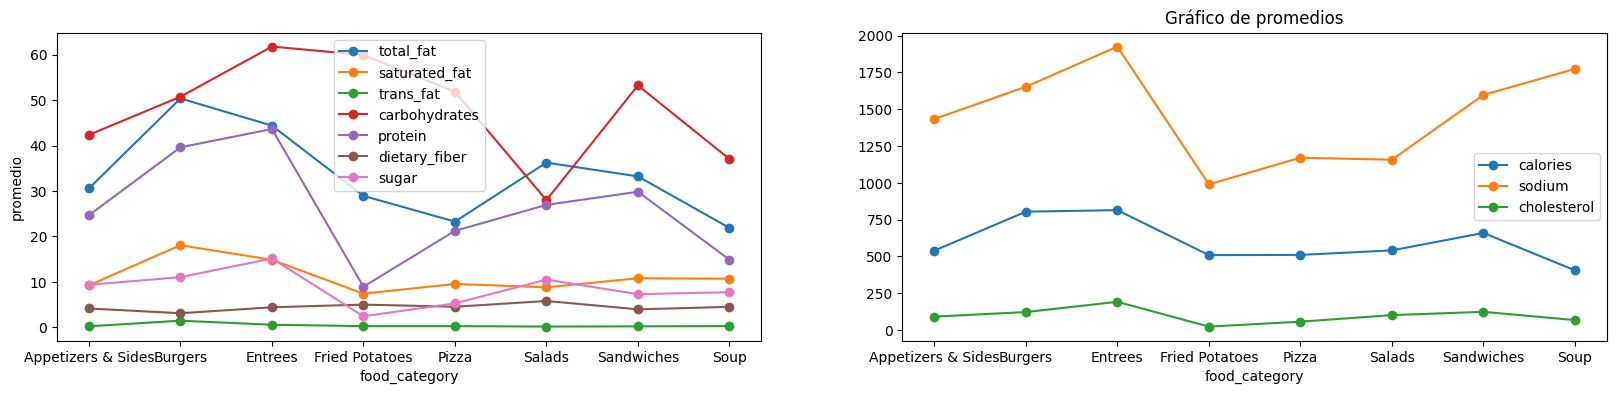

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False,figsize=(20, 4))

for i, series_lowValues in enumerate(series_lowValues):
    df[series_lowValues].groupby(df["food_category"]).mean().plot(
        ax=ax1,
        kind="line",
        label=series_lowValues,
        marker="o",
        color=f"C{i}",
    )
for i, series_HiValues in enumerate(series_HiValues):
    df[series_HiValues].groupby(df["food_category"]).mean().plot(
        ax=ax2,
        kind="line",
        label=series_HiValues,
        marker="o",
        color=f"C{i}",
    )
ax1.set_xlabel("food_category")
ax1.set_ylabel("promedio")
ax1.legend()
ax2.set_xlabel("food_category")
ax2.legend()
plt.title('Gráfico de promedios')

plt.show()

### valores de Mediana

In [65]:
#observo también la mediana para determinar cual es la mejor estrategia en el reemplazo de NaN
#df_mediana = df.groupby('food_category')[value_columns].agg(lambda x: x.median())
df_mediana = df.groupby('food_category')[value_columns].median()
df_mediana

,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
food_category,,,,,,,,,,
Appetizers & Sides,310.0,16.0,4.0,0.0,30.0,690.0,25.0,2.0,3.0,10.0
Burgers,770.0,47.0,17.0,1.5,120.0,1430.0,43.0,2.0,9.0,38.0
Entrees,600.0,30.0,9.0,0.0,110.0,1350.0,43.0,3.0,7.0,30.0
Fried Potatoes,425.0,23.0,4.5,0.0,0.0,730.0,46.0,4.0,1.0,5.0
Pizza,270.0,12.0,5.5,0.0,35.0,650.0,29.0,2.0,3.0,11.0
Salads,490.0,31.0,8.0,0.0,80.0,1050.0,21.0,5.0,7.0,26.0
Sandwiches,570.0,28.0,9.0,0.0,90.0,1310.0,46.0,3.0,5.0,26.0
Soup,290.0,15.0,6.0,0.0,45.0,1240.0,24.0,3.0,5.0,10.0


In [66]:
# Dado que los valores de las series corresponden a escalas diferentes, se crean 2 grupos de series. Uno para los valores promedio superiores a 250 y otro para los menores
# Separar las series
series_lowValues = ['total_fat','saturated_fat', 'trans_fat', 'carbohydrates','protein','dietary_fiber', 'sugar']
series_HiValues = ['calories', 'sodium', 'cholesterol']

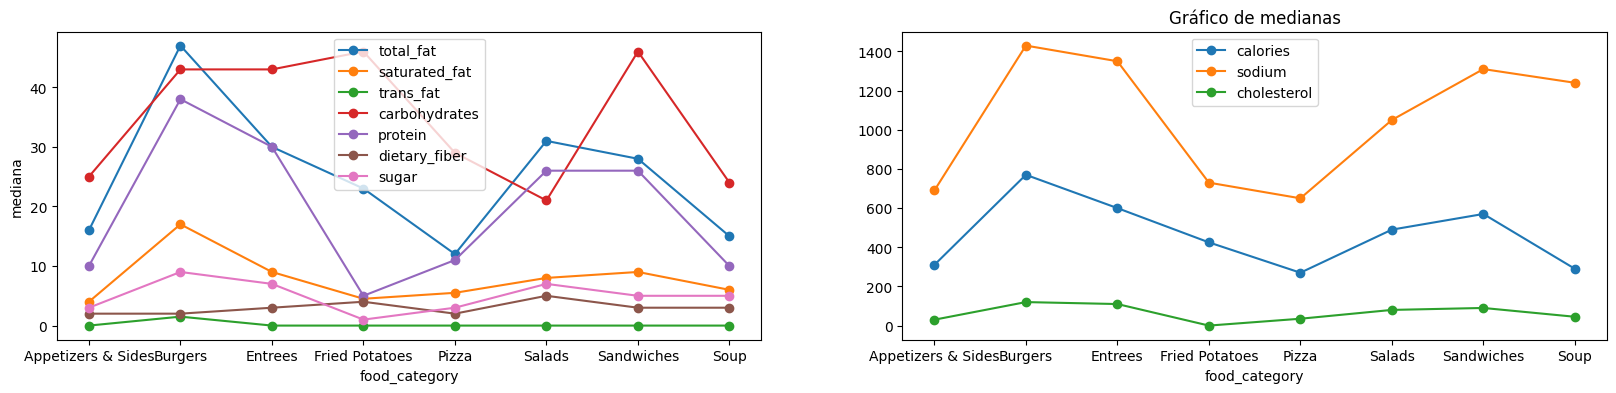

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False,figsize=(20, 4))

for i, series_lowValues in enumerate(series_lowValues):
    df[series_lowValues].groupby(df["food_category"]).median().plot(
        ax=ax1,
        kind="line",
        label=series_lowValues,
        marker="o",
        color=f"C{i}",
    )
for i, series_HiValues in enumerate(series_HiValues):
    df[series_HiValues].groupby(df["food_category"]).median().plot(
        ax=ax2,
        kind="line",
        label=series_HiValues,
        marker="o",
        color=f"C{i}",
    )
ax1.set_xlabel("food_category")
ax1.set_ylabel("mediana")
ax1.legend()
ax2.set_xlabel("food_category")
ax2.legend()
plt.title('Gráfico de medianas')

plt.show()

### valores de Moda

In [68]:
#observo también la moda para determinar cual es la mejor estrategia en el reemplazo de NaN
df_moda = df.groupby('food_category')[value_columns].agg(lambda x: x.mode())
df_moda

,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
food_category,,,,,,,,,,
Appetizers & Sides,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Burgers,560.0,40.0,11.0,0.0,120.0,"[820.0, 1440.0, 1480.0]",41.0,1.0,6.0,48.0
Entrees,490.0,18.0,8.0,0.0,0.0,620.0,0.0,0.0,0.0,17.0
Fried Potatoes,470.0,"[19.0, 24.0]",3.0,0.0,0.0,350.0,30.0,3.0,0.0,3.0
Pizza,230.0,9.0,6.0,0.0,30.0,440.0,17.0,1.0,2.0,2.0
Salads,540.0,0.0,9.0,0.0,0.0,870.0,"[11.0, 13.0]",4.0,3.0,5.0
Sandwiches,510.0,25.0,8.0,0.0,30.0,"[1060.0, 1200.0]",44.0,2.0,4.0,18.0
Soup,200.0,11.0,0.0,0.0,"[0.0, 35.0]","[560.0, 670.0, 1280.0, 1470.0]",13.0,1.0,4.0,5.0


In [69]:
#dado que algunos valores en la moda tienen mas de un valor, lo reemplazo por el promedio
def calcular_promedio(array):
    if isinstance(array, np.ndarray):
        return np.mean(array)
    else:
        return array
df_moda = df_moda.applymap(calcular_promedio)
df_moda

,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
food_category,,,,,,,,,,
Appetizers & Sides,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.0
Burgers,560.0,40.0,11.0,0.0,120.0,1246.666667,41.0,1.0,6.0,48.0
Entrees,490.0,18.0,8.0,0.0,0.0,620.000000,0.0,0.0,0.0,17.0
Fried Potatoes,470.0,21.5,3.0,0.0,0.0,350.000000,30.0,3.0,0.0,3.0
Pizza,230.0,9.0,6.0,0.0,30.0,440.000000,17.0,1.0,2.0,2.0
Salads,540.0,0.0,9.0,0.0,0.0,870.000000,12.0,4.0,3.0,5.0
Sandwiches,510.0,25.0,8.0,0.0,30.0,1130.000000,44.0,2.0,4.0,18.0
Soup,200.0,11.0,0.0,0.0,17.5,995.000000,13.0,1.0,4.0,5.0


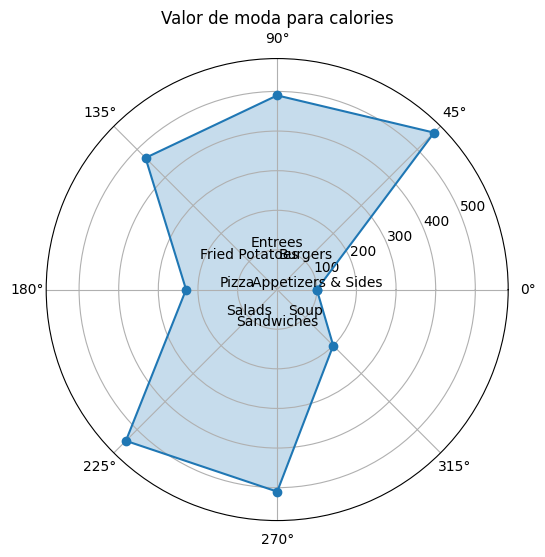

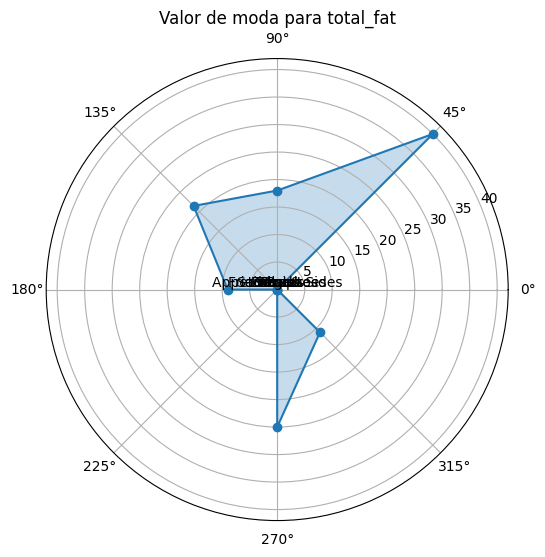

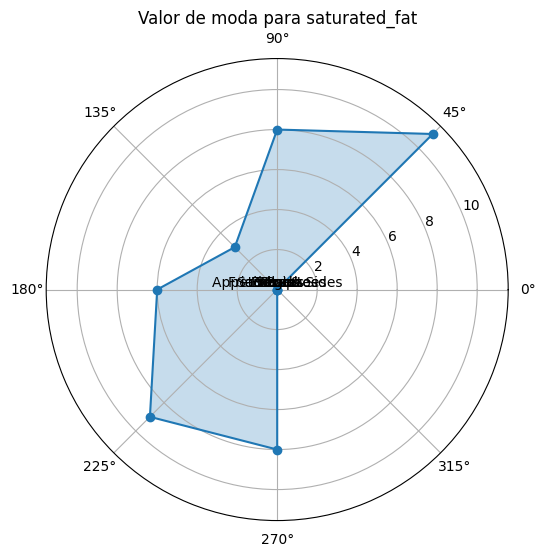

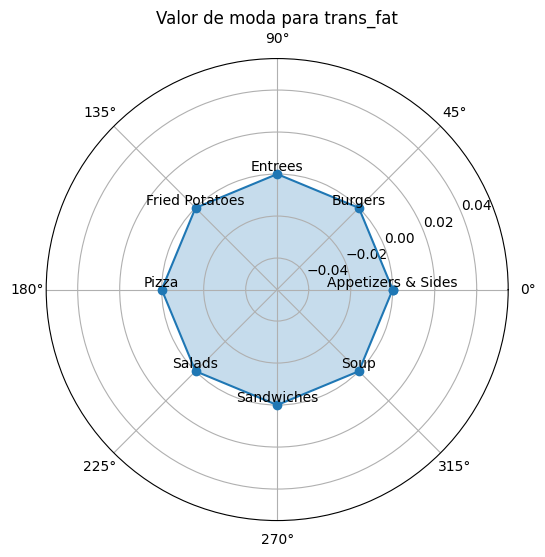

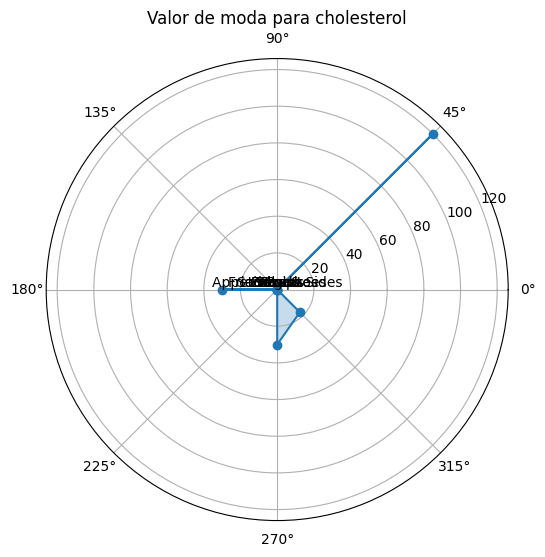

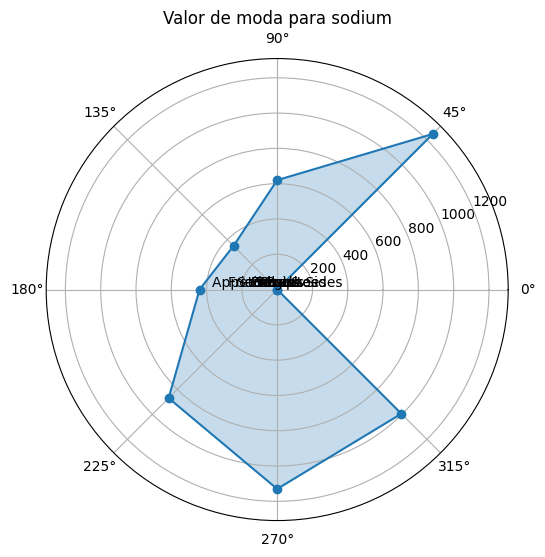

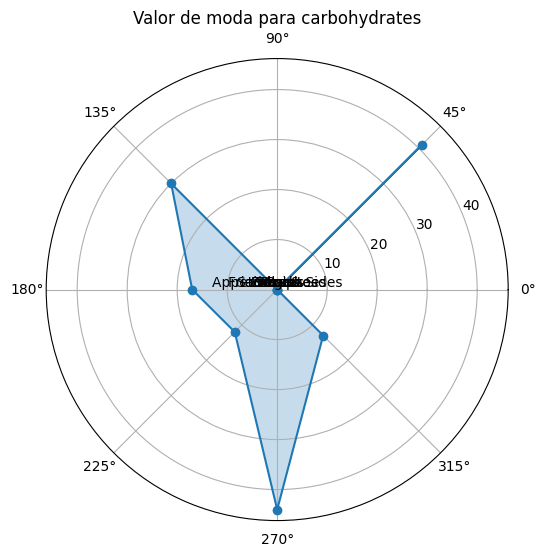

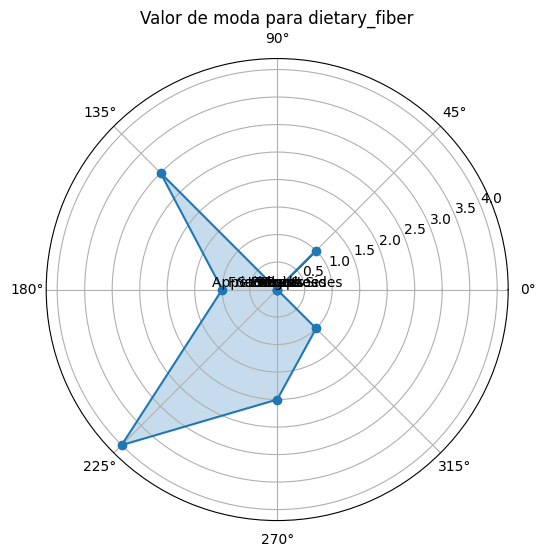

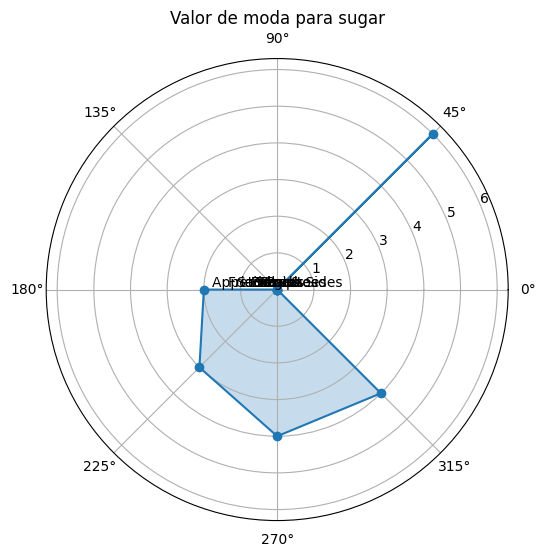

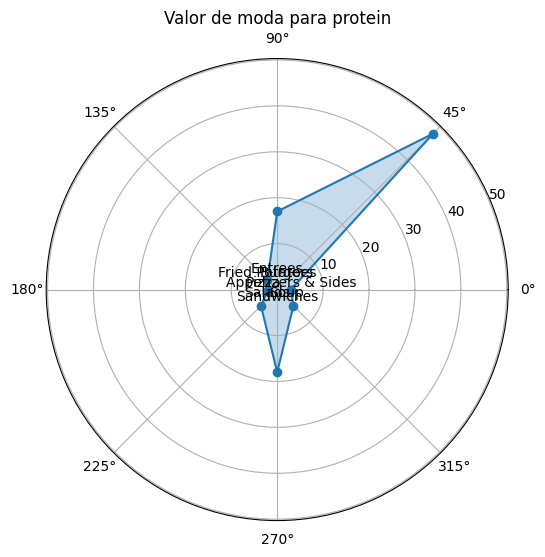

In [70]:
for column in df_moda.columns:
    values = df_moda[column]

    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    plt.figure(figsize=(6, 6))
    plt.polar(angles, values, 'o-')
    plt.fill(angles, values, alpha=0.25)
    plt.title(f'Valor de moda para {column}')

    labels = df_promedio.index
    for angle, label in zip(angles, labels):
        plt.text(angle, values[0], label, in_layout=True, ha='center', va='bottom')

    plt.show()

#Correlación entre series de datos



<ipython-input-71-e84f2886331c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.5,annot=True)


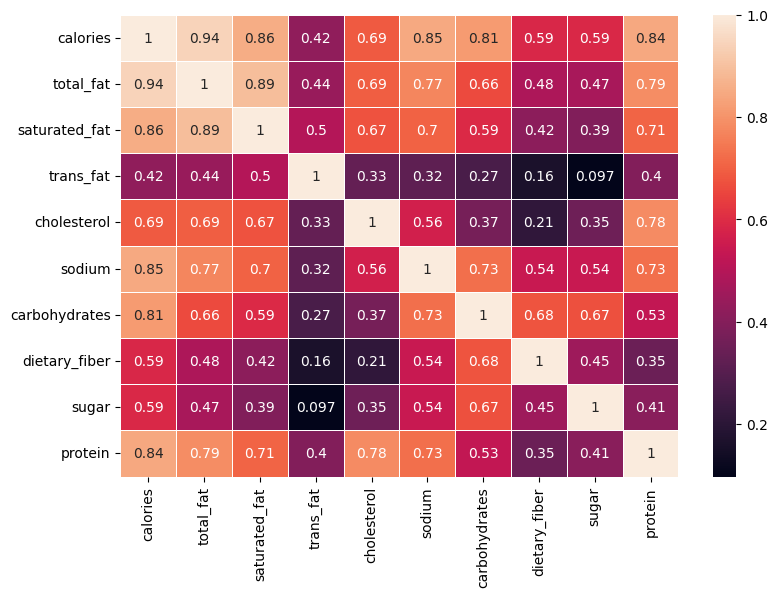

In [71]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

##Proteínas vs. Grasas totales
Dada la riqueza de algunos indicadores por sobre otros con poca amplitud de rango de valores, se analizan las correlaciones de:

*   Proteínas como nutriente principal en una dieta equilibrada.
*   Grasas Totales como elemento a evitar.

<Axes: xlabel='protein', ylabel='total_fat'>

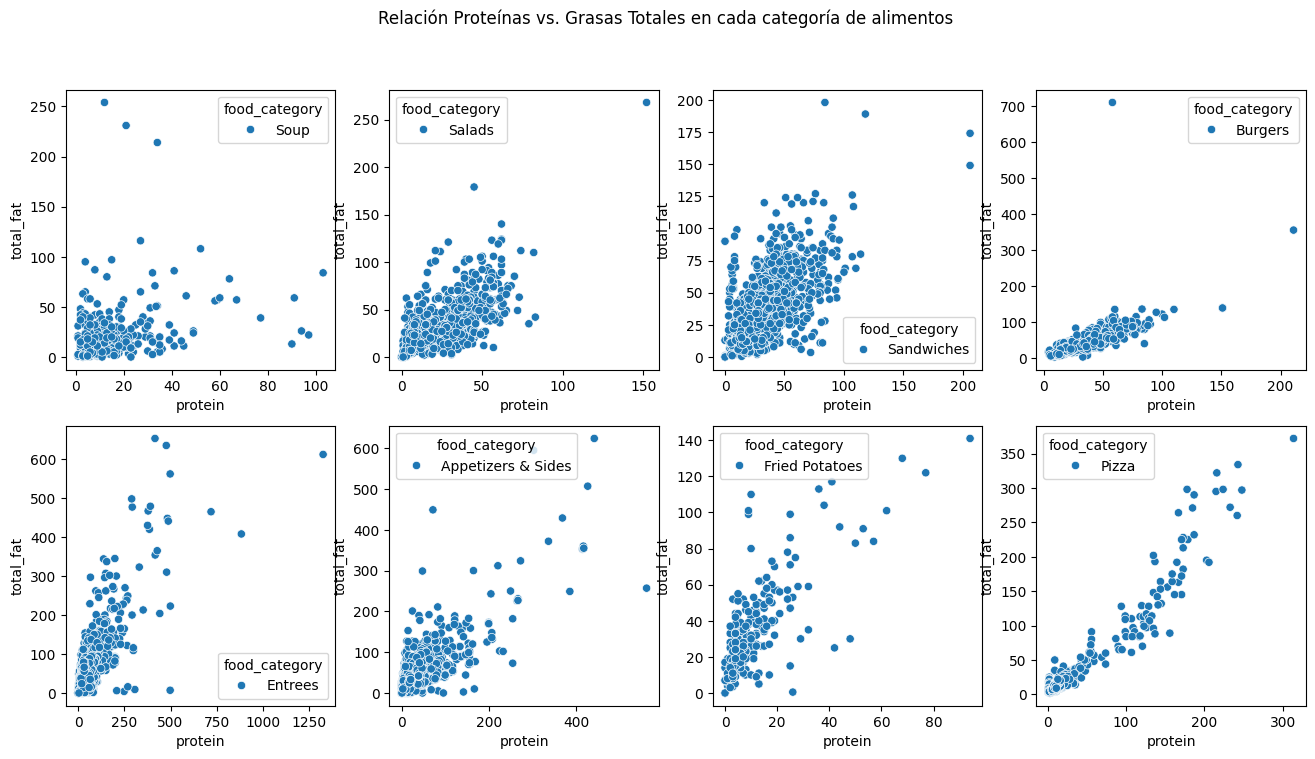

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

fig.suptitle('Relación Proteínas vs. Grasas Totales en cada categoría de alimentos')

sns.scatterplot(ax=axes[0, 0], data=df[df['food_category']=='Soup'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[0, 1], data=df[df['food_category']=='Salads'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[0, 2], data=df[df['food_category']=='Sandwiches'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[0, 3], data=df[df['food_category']=='Burgers'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[1, 0], data=df[df['food_category']=='Entrees'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[1, 1], data=df[df['food_category']=='Appetizers & Sides'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[1, 2], data=df[df['food_category']=='Fried Potatoes'], y='total_fat', x='protein',hue='food_category')
sns.scatterplot(ax=axes[1, 3], data=df[df['food_category']=='Pizza'], y='total_fat', x='protein',hue='food_category')

#Insights



Las categorías más interesantes para ofrecer una opción equilibrada de nutrientes son Hambuerguesas,sopas y sandwiches por su amplio valor en proteínas y bajo en Grasas.
Las pizzas tamtambién ofrecen proteinas en algunas de sus opciones pero la relación con las grasas es muy estrecha.


Los aderesos y salsas no aoprtan significativas cantidad de nutrientes y una elevada cantidad de sodio y grasas.